# 데이터의 관계를 표현하는 산점도
- 산점도로 x, y축 데이터의 관계를 파악하고, 점의 색과 크기로 정보를 표현할 수 있다.
___

In [1]:
import matplotlib.pyplot as plt
# 폰트 확인하기
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist if 'Malgun' in f.name]
# '맑은 고딕'이 설치되어 있는지 검색
# 한글폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 한글폰트 사용시 '-'기호가 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

## 1. 스캐터플롯
___
- 점의 크기, 색깔로 정보를  표현할 수 있다. (버블차트)
- 크기는 s, 색은 c로 지정한다.

In [2]:
# 데이터
x = [1,5,6,9,10]
y = [1,5,3,9,7]

### 1.1 기본

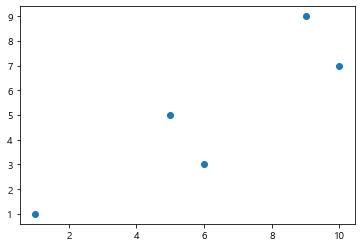

In [3]:
plt.scatter(x, y)

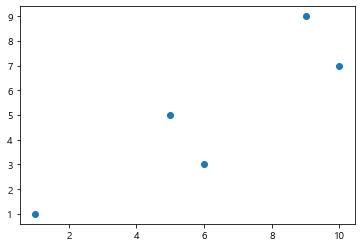

In [4]:
plt.plot(x, y, 'o')

### 1.2. 점의 크기
> s = 크기공통지정   
> s = 크기 목록   
- plt.scatter()의 파라미터 s로 점 크기를 지정한다.
- 점 크기는 공통된 크기로 지정하거나 점마다 다른 크기로 지정할 수 있다.

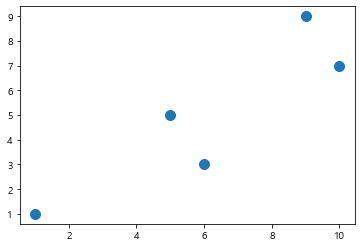

In [5]:
plt.scatter(x, y, s=100)

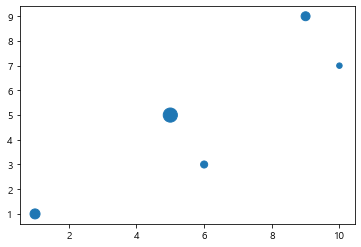

In [7]:
plt.scatter(x, y, s=[100, 200, 50, 80, 30])
# 점마다 다른 크기로 지정

### 1.3. 점의 색상
- 위와 마찬가지로 공통으로 지정하거나 점마다 다르게 지정 가능
- 파라미터 c를 사용

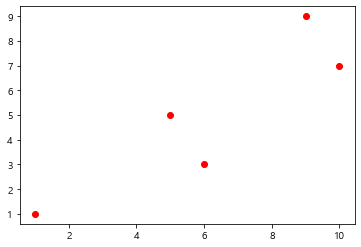

In [8]:
plt.scatter(x, y, c='r')


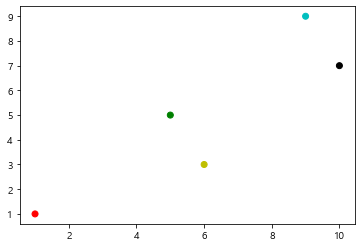

In [9]:
plt.scatter(x, y, c=['r', 'g', 'y', 'c', 'k'])


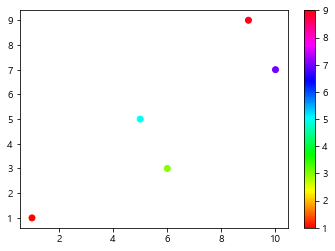

In [12]:
# 컬러맵 사용 : cmap = 컬러맵, 컬러맵으로 알록달록한 산점도를 만들 수 있다.
plt.scatter(x, y, c=y, cmap='hsv')
plt.colorbar()

## 2. 산점도 예제
___
### 2.1. 데이터 준비
- 어느 레스토랑의 팁 데이터
- 지불금액, 팁, 성별, 흡연여부, 요일, 시간대, 테이블인원

In [13]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips.shape

(244, 7)

### 2.2. 지불금액과 팁의 관계
- 지불금액이 클수록 팁도 많이 줄까?

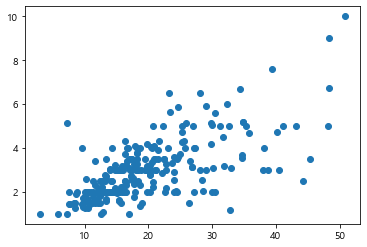

In [15]:
plt.scatter(tips['total_bill'], tips['tip'])

### 2.3. 점의 크기로 테이블 인원 표시

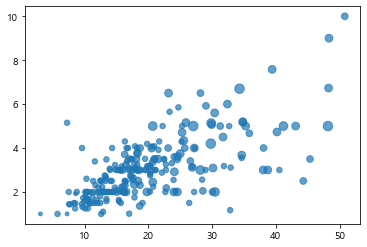

In [21]:
plt.scatter(tips['total_bill'], tips['tip'], s= tips['size'] * 15, alpha = 0.7)

### 2.4. 점의 색으로 성별 표시

In [22]:
# 성별에 따른 color 칼럼 추가
def set_color(x):
    if x == 'Male':
        return 'b'
    else:
        return 'r'

tips['color'] = tips['sex'].apply(set_color)

In [23]:
tips['color']

0      r
1      b
2      b
3      b
4      r
      ..
239    b
240    r
241    b
242    b
243    r
Name: color, Length: 244, dtype: category
Categories (2, object): ['b', 'r']

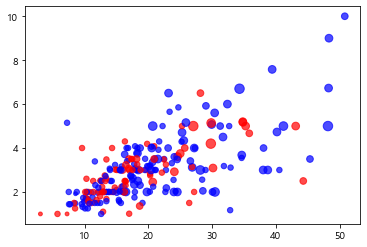

In [24]:
plt.scatter(tips['total_bill'], tips['tip'], s= tips['size'] * 15, alpha = 0.7, c=tips['color'])